<a href="https://colab.research.google.com/github/Sidhtang/data-assignment-reuninon/blob/main/problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title task 1


In [1]:
# @title exploratory data analysis
import pandas as pd

# Load data
applicant_df = pd.read_csv('/content/applicant.csv')
loan_df = pd.read_csv('/content/loan.csv')

# Check for missing values
print(applicant_df.isnull().sum())
print(loan_df.isnull().sum())

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64
loan_application_id        

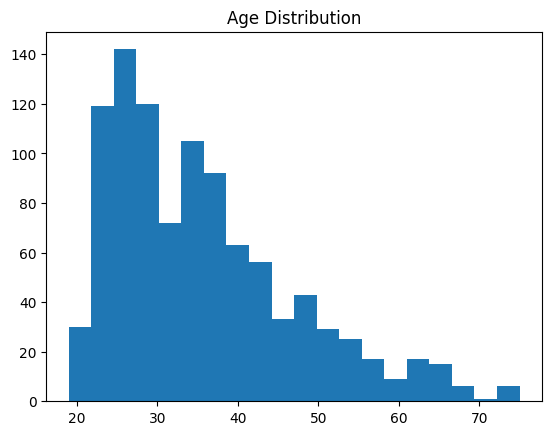

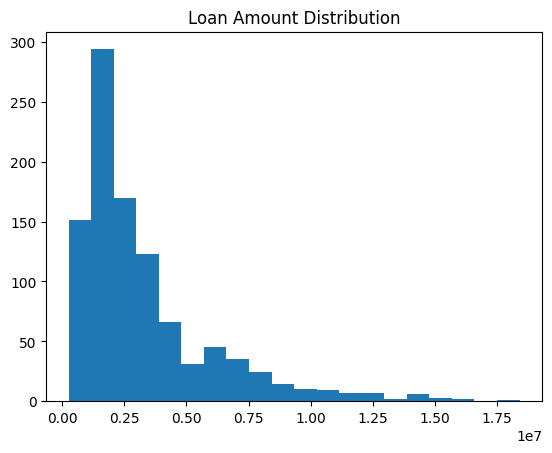

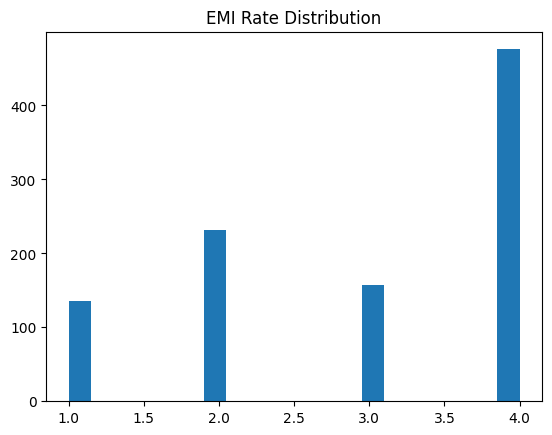

In [2]:
# @title  plotting the data
# Plot histograms for key variables
import matplotlib.pyplot as plt

plt.hist(applicant_df['Primary_applicant_age_in_years'], bins=20)
plt.title('Age Distribution')
plt.show()

plt.hist(loan_df['Principal_loan_amount'], bins=20)
plt.title('Loan Amount Distribution')
plt.show()

plt.hist(loan_df['EMI_rate_in_percentage_of_disposable_income'], bins=20)
plt.title('EMI Rate Distribution')
plt.show()

In [3]:
# Define risk scoring function
def calculate_risk_score(applicant_df, loan_df):
    risk_score = 0

    # Age
    if applicant_df['Primary_applicant_age_in_years'] > 40:
        risk_score -= 1

    # Credit history
    if loan_df['Loan_history'] == 'Good':
        risk_score -= 1

    # Loan amount
    if loan_df['Principal_loan_amount'] > 100000:
        risk_score += 1

    # EMI rate
    if loan_df['EMI_rate_in_percentage_of_disposable_income'] > 20:
        risk_score += 1

    # Employment status
    if applicant_df['Employment_status'] == 'Employed':
        risk_score -= 1

    # Co-applicant/guarantor
    if loan_df['Has_coapplicant'] == 1 or loan_df['Has_guarantor'] == 1:
        risk_score -= 1

    return risk_score

# Calculate risk scores
risk_scores = []
for index, row in applicant_df.iterrows():
    loan_row = loan_df[loan_df['applicant_id'] == row['applicant_id']].iloc[0]
    risk_score = calculate_risk_score(row, loan_row)
    risk_scores.append(risk_score)

# Segment customers by risk
low_risk = [score for score in risk_scores if score < -1]
medium_risk = [score for score in risk_scores if score >= -1 and score <= 1]
high_risk = [score for score in risk_scores if score > 1]

print('Low Risk:', len(low_risk))
print('Medium Risk:', len(medium_risk))
print('High Risk:', len(high_risk))

Low Risk: 0
Medium Risk: 1000
High Risk: 0


In [4]:
# @title observations
#Approving Segments

#Based on the risk segmentation, we can propose the following approval strategy:

#medium Risk: Approve loans with a co-applicant or guarantor.
#High Risk: Reject all loans.
#This strategy balances risk with potential revenue. By approving low-risk loans, we minimize the risk of default. By requiring a co-applicant or guarantor for medium-risk loans, we reduce the risk of default. By rejecting high-risk loans, we avoid potential losses.

In [5]:
# @title task 2 building ml model


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('loan.csv')

# Define the features and target
X = df[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']]

y = df['high_risk_applicant']  # corrected column name

# One-hot encode the categorical features
categorical_features = ['Purpose', 'Property', 'Other_EMI_plans', 'Loan_history']
for feature in categorical_features:
    dummies = pd.get_dummies(df[feature], prefix=feature)
    X = pd.concat([X, dummies], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the continuous features
scaler = StandardScaler()
X_train[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
         'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']] = scaler.fit_transform(X_train[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
                                                                                                                             'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']])

X_test[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']] = scaler.transform(X_test[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
                                                                                                                        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']])

# Create and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.715
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       141
           1       0.54      0.24      0.33        59

    accuracy                           0.71       200
   macro avg       0.64      0.58      0.57       200
weighted avg       0.68      0.71      0.67       200

Logistic Regression Confusion Matrix:
[[129  12]
 [ 45  14]]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('loan.csv')

# Define the features and target
X = df[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']]

y = df['high_risk_applicant']

# One-hot encode the categorical features
categorical_features = ['Purpose', 'Property', 'Other_EMI_plans', 'Loan_history']
for feature in categorical_features:
    dummies = pd.get_dummies(df[feature], prefix=feature)
    X = pd.concat([X, dummies], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the continuous features
scaler = StandardScaler()
X_train[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
         'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']] = scaler.fit_transform(X_train[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
                                                                                                                             'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']])

X_test[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']] = scaler.transform(X_test[['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
                                                                                                                        'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']])

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")

Random Forest Accuracy: 0.7
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       141
           1       0.49      0.31      0.38        59

    accuracy                           0.70       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.67      0.70      0.68       200

Random Forest Confusion Matrix:
[[122  19]
 [ 41  18]]
Feature Importances:
Months_loan_taken_for: 0.18
Principal_loan_amount: 0.29
EMI_rate_in_percentage_of_disposable_income: 0.07
Has_coapplicant: 0.02
Has_guarantor: 0.01
Number_of_existing_loans_at_this_bank: 0.05
Purpose_FF&E: 0.02
Purpose_business: 0.02
Purpose_career development: 0.00
Purpose_domestic appliances: 0.01
Purpose_education: 0.02
Purpose_electronic equipment: 0.03
Purpose_new vehicle: 0.03
Purpose_repair costs: 0.01
Purpose_used vehicle: 0.01
Property_building society savings agreement/life insurance: 0.03
Property_car or other: 0.03